In [21]:
# import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
import datetime
from scipy.stats import linregress, pearsonr

### U.S. Department of Transportation data from the Bureau of Transportation Statistics 
#### Monthly Transportation Statistics

In [4]:
# read in data
monthly_transport_df = pd.read_csv("Resources/Monthly_Transportation_Statistics.csv")

# preview dataframe
monthly_transport_df.head()

,Index,Date,Air Safety - General Aviation Fatalities,Highway Fatalities Per 100 Million Vehicle Miles Traveled,Highway Fatalities,U.S. Airline Traffic - Total - Seasonally Adjusted,U.S. Airline Traffic - International - Seasonally Adjusted,U.S. Airline Traffic - Domestic - Seasonally Adjusted,Transit Ridership - Other Transit Modes - Adjusted,Transit Ridership - Fixed Route Bus - Adjusted,...,Heavy truck sales SAAR (millions),U.S. Airline Traffic - Total - Non Seasonally Adjusted,Light truck sales SAAR (millions),U.S. Airline Traffic - International - Non Seasonally Adjusted,Auto sales SAAR (millions),U.S. Airline Traffic - Domestic - Non Seasonally Adjusted,Transborder - Total North American Freight,Transborder - U.S. - Mexico Freight,U.S. marketing air carriers on-time performance (percent),Transborder - U.S. - Canada Freight
0,732,01/01/2008 12:00:00 AM,27.0,1.22,8459.0,NaN,NaN,NaN,13911623.0,442844351.0,...,322000.0,NaN,7963000.0,NaN,7420000.0,NaN,7.558131e+10,2.889792e+10,NaN,4.668339e+10
1,733,02/01/2008 12:00:00 AM,42.0,NaN,NaN,NaN,NaN,NaN,13552083.0,436354219.0,...,326000.0,NaN,7923000.0,NaN,7243000.0,NaN,7.879298e+10,2.993730e+10,NaN,4.885567e+10
2,734,03/01/2008 12:00:00 AM,29.0,NaN,NaN,NaN,NaN,NaN,14503295.0,459855512.0,...,319000.0,NaN,7511000.0,NaN,7284000.0,NaN,8.156006e+10,2.940936e+10,NaN,5.215070e+10
3,735,04/01/2008 12:00:00 AM,29.0,1.25,NaN,NaN,NaN,NaN,15120273.0,472743286.0,...,337000.0,NaN,6942000.0,NaN,7326000.0,NaN,8.635952e+10,3.190799e+10,NaN,5.445152e+10
4,736,05/01/2008 12:00:00 AM,54.0,NaN,NaN,NaN,NaN,NaN,15364239.0,475240402.0,...,333000.0,NaN,6406000.0,NaN,7957000.0,NaN,8.552266e+10,3.112220e+10,NaN,5.440046e+10


In [8]:
# view columns
col_list = monthly_transport_df.columns.values.tolist()
col_list

['Index',
 'Date',
 'Air Safety - General Aviation Fatalities',
 'Highway Fatalities Per 100 Million Vehicle Miles Traveled',
 'Highway Fatalities',
 'U.S. Airline Traffic - Total - Seasonally Adjusted',
 'U.S. Airline Traffic - International - Seasonally Adjusted',
 'U.S. Airline Traffic - Domestic - Seasonally Adjusted',
 'Transit Ridership - Other Transit Modes - Adjusted',
 'Transit Ridership - Fixed Route Bus - Adjusted',
 'Transit Ridership - Urban Rail - Adjusted',
 'Freight Rail Intermodal Units',
 'Freight Rail Carloads',
 'Highway Vehicle Miles Traveled - All Systems',
 'Highway Vehicle Miles Traveled - Total Rural',
 'Highway Vehicle Miles Traveled - Other Rural',
 'Highway Vehicle Miles Traveled - Rural Other Arterial',
 'Highway Vehicle Miles Traveled - Rural Interstate',
 'State and Local Government Construction Spending - Breakwater/Jetty',
 'State and Local Government Construction Spending - Dam/Levee',
 'State and Local Government Construction Spending - Conservation a

In [13]:
air_traffic_df = monthly_transport_df[['Date','U.S. Airline Traffic - Total - Non Seasonally Adjusted']]
air_traffic_df

,Date,U.S. Airline Traffic - Total - Non Seasonally Adjusted
0,01/01/2008 12:00:00 AM,NaN
1,02/01/2008 12:00:00 AM,NaN
2,03/01/2008 12:00:00 AM,NaN
3,04/01/2008 12:00:00 AM,NaN
4,05/01/2008 12:00:00 AM,NaN
...,...,...
155,12/01/2020 12:00:00 AM,31180000.0
156,01/01/2021 12:00:00 AM,NaN
157,02/01/2021 12:00:00 AM,NaN
158,03/01/2021 12:00:00 AM,NaN


In [15]:
air_traffic_df.dtypes

Date                                                       object
U.S. Airline Traffic - Total - Non Seasonally Adjusted    float64
dtype: object

In [26]:
date_air_traffic = air_traffic_df.loc['Date'] = pd.to_datetime(air_traffic_df['Date']).dt.date
date_air_traffic

0       2008-01-01
1       2008-02-01
2       2008-03-01
3       2008-04-01
4       2008-05-01
           ...    
156     2021-01-01
157     2021-02-01
158     2021-03-01
159     2021-04-01
Date           NaT
Name: Date, Length: 161, dtype: object

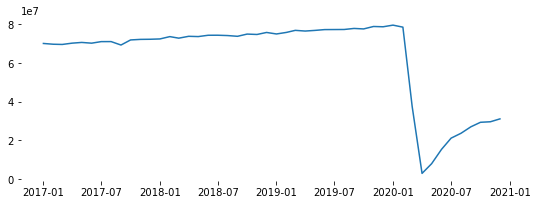

In [30]:
# set x-axis
x_axis = air_traffic_df[["Date"]]

y_axis = air_traffic_df[['U.S. Airline Traffic - Total - Non Seasonally Adjusted']]

plt.figure(figsize=(9, 3))

plt.plot(x_axis, y_axis)
plt.box(False)
plt.show()